In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

### Load the experiment and corresponding libraries

In [2]:
project_path = os.path.join(Path.home(), "projects")
sys.path.append(project_path)  # enable import of "bias_transfer_recipes"
os.chdir(os.path.join(project_path,"bias_transfer_recipes/work/"))

In [3]:
from bias_transfer_recipes.bias_transfer_recipes.main import load_experiment
experiment = load_experiment(recipe="_2021_09_24_aistats", 
                             experiment="mnist", 
                             schema="",  # schema name will automatically be generated from recipe and experiment names 
                             base_dir=os.path.join(project_path,"bias_transfer_recipes/bias_transfer_recipes/"),
                             import_prefix="bias_transfer_recipes.bias_transfer_recipes.", 
                             dev_mode=False  
                            )

CalledProcessError: Command '['checkout_code', '--repository', '/home/anix/projects/bias_transfer', '--checkout-dir', '/home/anix/projects/bias_transfer_recipes/work/bias_transfer', '--commit-hash', '932f3862c4d4abd66b4978386dc2f9d3002bfcb9', '--get-path']' returned non-zero exit status 1.

In [ ]:
from nntransfer.tables.transfer import *
from nntransfer.tables.nnfabrik import *
from nntransfer.analysis.plot import plot, save_plot
from nntransfer.configs.base import Description
import nnfabrik as nnf
schema

In [5]:
schema.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__transferred_trained_model,9237f16f657ddbaa88cc3adcbb943904,reserved,=BLOB=,,=BLOB=,anix@35.172.136.2,ip-172-31-65-121,27,591717,2021-12-03 22:51:36
__transferred_trained_model,f5fa3a1ae77ef0ee488d3208b27cf54d,reserved,=BLOB=,,=BLOB=,anix@134.2.168.25,slurm-bm-53.novalocal,421672,643383,2021-12-04 14:36:22


In [25]:
# dElete all jobs in error state:5
if schema.database != "nnfabrik_core": 
    (schema.jobs & "status='error'").delete()

In [6]:
TransferredTrainedModel()

transfer_step transfer step,model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,collapsed_history hash of keys from all previous training steps,data_transfer flag if we do data transfer,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,trainedmodel_ts UTZ timestamp at time of insertion
0,bias_transfer.models.classification_model_builder,302a5fa0d5d19412ad2848b82355b58e,bias_transfer.dataset.torchvision_dataset_loader,2140f0d175739a655060a344e2e9e023,bias_transfer.trainer.img_classification,1402cb4ebc958ad5c3ba14208b93c079,42,,0,Training on MNIST-C.MNIST mlp.,54.2883,=BLOB=,Arne Nix,2021-10-14 14:59:07
0,bias_transfer.models.classification_model_builder,302a5fa0d5d19412ad2848b82355b58e,bias_transfer.dataset.torchvision_dataset_loader,34cf5fe50a3e4763063dce5971dc7ccb,bias_transfer.trainer.img_classification,160eee09a9145f9631fd2c76950ccdad,42,,0,.MNIST mlp.,98.53,=BLOB=,Arne Nix,2021-10-12 21:45:59
0,bias_transfer.models.classification_model_builder,302a5fa0d5d19412ad2848b82355b58e,bias_transfer.dataset.torchvision_dataset_loader,388ce17de43c3aeca8c7140a1e4e48e0,bias_transfer.trainer.img_classification,aecf4386c39ac3afa0a2130e4caa131c,42,,0,.MNIST mlp.,98.31,=BLOB=,Arne Nix,2021-11-30 17:04:41
0,bias_transfer.models.classification_model_builder,302a5fa0d5d19412ad2848b82355b58e,bias_transfer.dataset.torchvision_dataset_loader,388ce17de43c3aeca8c7140a1e4e48e0,bias_transfer.trainer.img_classification,aecf4386c39ac3afa0a2130e4caa131c,44,,0,.MNIST mlp.,98.31,=BLOB=,Arne Nix,2021-11-30 19:23:01
0,bias_transfer.models.classification_model_builder,302a5fa0d5d19412ad2848b82355b58e,bias_transfer.dataset.torchvision_dataset_loader,388ce17de43c3aeca8c7140a1e4e48e0,bias_transfer.trainer.img_classification,d333a73e86b02cbc09208e96bc78b973,42,,0,.MNIST mlp.,98.31,=BLOB=,Arne Nix,2021-12-05 06:57:16
0,bias_transfer.models.classification_model_builder,6e8d076986d05d23ae8eea301dce8e35,bias_transfer.dataset.torchvision_dataset_loader,28ea73db257abbcbd9bb2e4bd886928e,bias_transfer.trainer.img_classification,e0b2dab4354940870b54319fe5398949,42,,0,Translation Invariant..,93.01,=BLOB=,Arne Nix,2021-12-02 11:35:08
0,bias_transfer.models.classification_model_builder,6e8d076986d05d23ae8eea301dce8e35,bias_transfer.dataset.torchvision_dataset_loader,494ecdc503c7b36903e907930840b94e,bias_transfer.trainer.img_classification,e0b2dab4354940870b54319fe5398949,42,,0,Translation Invariant..,81.8,=BLOB=,Arne Nix,2021-12-02 10:31:20
0,bias_transfer.models.classification_model_builder,6e8d076986d05d23ae8eea301dce8e35,bias_transfer.dataset.torchvision_dataset_loader,d58cbeb45feed16a5439ea514ca46545,bias_transfer.trainer.img_classification,e0b2dab4354940870b54319fe5398949,42,,0,Translation Invariant..,92.91,=BLOB=,Arne Nix,2021-12-02 16:30:26
0,bias_transfer.models.classification_model_builder,6e8d076986d05d23ae8eea301dce8e35,bias_transfer.dataset.torchvision_dataset_loader,ed2cd6afb1893eb6b07d759aa69bca9a,bias_transfer.trainer.img_classification,e0b2dab4354940870b54319fe5398949,42,,0,Translation Invariant..,81.56,=BLOB=,Arne Nix,2021-12-01 09:20:07
0,bias_transfer.models.classification_model_builder,6e8d076986d05d23ae8eea301dce8e35,bias_transfer.dataset.torchvision_dataset_loader,f912f703baaac4486985be1cb3a9f666,bias_transfer.trainer.img_classification,e0b2dab4354940870b54319fe5398949,42,,0,Translation Invariant..,78.58,=BLOB=,Arne Nix,2021-11-29 22:04:20


In [6]:
exp = experiment.transfer_experiments[Description(name='Translation Invariant Equivariance Transfer (repititions:1, id_between_filters:True, id_factor:100.0)', seed=42)]
TransferredTrainedModel() & exp.get_restrictions(1)

transfer_step transfer step,model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,collapsed_history hash of keys from all previous training steps,data_transfer flag if we do data transfer,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,trainedmodel_ts UTZ timestamp at time of insertion
1,bias_transfer.models.classification_model_builder,725b46c0eca76db0b83c6cf4be43c913,bias_transfer.dataset.torchvision_dataset_loader,34cf5fe50a3e4763063dce5971dc7ccb,bias_transfer.trainer.img_classification,239f82074ecc53f0491fb9e5ae3a5fe4,42,fbb26215f6c6e17d2ae8d0e5214ddb34,0,Transfer without fixed identity regularization.MNIST cnn.,19.2416,=BLOB=,Arne Nix,2021-10-13 18:07:15


In [26]:
exp.get_restrictions(0)

{'dataset_hash': '2140f0d175739a655060a344e2e9e023',
 'dataset_fn': 'bias_transfer.dataset.torchvision_dataset_loader',
 'model_hash': '302a5fa0d5d19412ad2848b82355b58e',
 'model_fn': 'bias_transfer.models.classification_model_builder',
 'trainer_hash': '1402cb4ebc958ad5c3ba14208b93c079',
 'trainer_fn': 'bias_transfer.trainer.img_classification',
 'seed': 42,
 'collapsed_history': ''}

In [28]:
exp = experiment.transfer_experiments[Description(name='MNIST-C Experiment Student', seed=42)]
TransferredTrainedModel() & exp.get_restrictions(0)

transfer_step transfer step,model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,collapsed_history hash of keys from all previous training steps,data_transfer flag if we do data transfer,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,trainedmodel_ts UTZ timestamp at time of insertion


In [9]:
import tempfile
import torch
with tempfile.TemporaryDirectory() as temp_dir:
    state = ((TransferredTrainedModel() & exp.get_restrictions(1)) * TransferredTrainedModel.ModelStorage()).fetch1("model_state", download_path=temp_dir)
    state_dict = torch.load(state)
kernels = state_dict["kernels"].cpu().numpy()
print(kernels.shape)

from nntransfer.analysis.plot import plot
@plot
def plot_kernels(kernels, fig, ax):
    for i in range(5):
        for j in range(5):
            ax[i][j].imshow(kernels[i*5+j], cmap="viridis")
#             ax[i][j].set_title(i*5+j)
            ax[i][j].axis('off')
fig, ax = plot_kernels(kernels, nrows=5, ncols=5, tight=False, style="light_nips_tex", save="kernels_translation_clean", fraction=0.6)

(25, 5, 5)


No handles with labels found to put in legend.


In [224]:
from bias_transfer.dataset.torchvision_loader import torchvision_dataset_loader
conf = (Dataset() & {"dataset_hash": "34cf5fe50a3e4763063dce5971dc7ccb"}).fetch1("dataset_config")
data = torchvision_dataset_loader(42, **conf)
test = data["test"]["img_classification"]
img = next(iter(test))[0][:1]

Loading dataset: MNIST
Images already downloaded in ./data/image_classification/torchvision/MNIST
Images already downloaded in ./data/image_classification/torchvision/MNIST-C


In [225]:
from bias_transfer.models.learned_equiv import LearnedEquivariance


@plot
def plot_images(kernels, img, fig, ax):
    model = LearnedEquivariance(kernel_size=5,group_size=25)
    model.eval()
    model.kernels.data = torch.tensor(kernels)
    for i in range(5):
        for j in range(5):
            filter_out = model(img, g=torch.ones(img.shape[0],dtype=int)*(i*5+j),l=0,n=1).cpu().detach().numpy()
            ax[i][j].imshow(filter_out.reshape(28,28,1), cmap="viridis")
#             ax[i][j].set_title(i*5+j)
            ax[i][j].axis('off')

fig, ax = plot_images(kernels, img, nrows=5, ncols=5, tight=False, style="light_nips_tex", save="images_translation_clean", fraction=0.5)
    

No handles with labels found to put in legend.


In [172]:
filter_out.shape

torch.Size([1, 1, 28, 28])

In [164]:
%debug

> /home/anix/projects/bias_transfer/bias_transfer/models/learned_equiv.py(194)forward()
    192             )  # Troublesome if spatial dimension smaller than padding! (for cirular padding)
    193             # print("x_padded", x_padded.shape)
--> 194             x = conv_op(
    195                 x_padded,
    196                 kernel,



ipdb>  x.shape


torch.Size([1, 64, 28, 28])


ipdb>  b
ipdb>  print(b)


*** NameError: name 'b' is not defined


ipdb>  print(g)


1


ipdb>  q


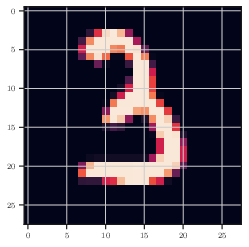

In [142]:
plt.imshow(img.reshape(28,28,1))

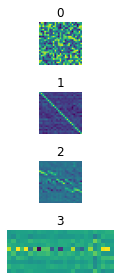

In [77]:
fig, axs = plt.subplots(4)
for i in range(4):
    weight = state_dict[f"layer_transforms.{i}.weight"].cpu().numpy()
    axs[i].imshow(weight)
    axs[i].set_title(i)
    axs[i].axis('off')
fig.tight_layout()

In [ ]:
list(experiment.transfer_experiments.keys())

In [6]:
from bias_transfer.analysis.general_results import *
analyzer = ResultsAnalyzer()

In [7]:
analyzer.load_data(experiment.transfer_experiments)

In [8]:
analyzer.data

{Description(name='Translation Invariant Equivariance Transfer G: 4,  gaussian_std:0.0, ce_factor:1.0, hinge_epsilon:1.0, random_init:True, between_filters:Trueclamp: True, cut_grad: True, iterations: 0', seed=42): {0: <neuralpredictors.training.tracking.AdvancedTracker at 0x7f9c3c1b74f0>,
  1: <neuralpredictors.training.tracking.AdvancedTracker at 0x7f9c3c1b7520>,
  2: <neuralpredictors.training.tracking.AdvancedTracker at 0x7f9c3c1b7310>},
 Description(name='Translation Invariant Equivariance Transfer G: 4,  gaussian_std:0.0, ce_factor:1.0, hinge_epsilon:1.0, random_init:True, between_filters:Falseclamp: True, cut_grad: True, iterations: 0', seed=42): {0: <neuralpredictors.training.tracking.AdvancedTracker at 0x7f9c3c1b7eb0>,
  1: <neuralpredictors.training.tracking.AdvancedTracker at 0x7f9c71e6d1c0>,
  2: <neuralpredictors.training.tracking.AdvancedTracker at 0x7f9c71e6d730>},
 Description(name='Translation Invariant Equivariance Transfer G: 4,  gaussian_std:0.0, ce_factor:1.0, hing

In [9]:
df = analyzer.generate_table(objectives=(("Test","img_classification","accuracy"),
                                         ("translate","img_classification","accuracy"),
                                         ("Rotation Test","img_classification","accuracy"),
                                         ("Noise noise_std 0.08_0.2.0.12_0.2.0.18_0.2.0.26_0.2.0.38_0.2","img_classification","accuracy")),
                            last_n=1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", None)
# df.sort_values(['name', '0: translate'], ascending=[True, False])
# df.sort_values(['name', '0: Rotation Test'], ascending=[True, False])
df

,index,seed,0: Test,0: translate,0: Rotation Test,alpha
name,,,,,,
Translation Invariant Equivariance Transfer G,0,42,17.69,12.39,14.13,"4, gaussian_std:0.0, ce_factor:1.0, hinge_epsilon:1.0, random_init:True, between_filters:Trueclamp: True, cut_grad: True, iterations: 0"
Translation Invariant Equivariance Transfer G,1,42,17.69,12.39,14.13,"4, gaussian_std:0.0, ce_factor:1.0, hinge_epsilon:1.0, random_init:True, between_filters:Falseclamp: True, cut_grad: True, iterations: 0"
Translation Invariant Equivariance Transfer G,2,42,17.69,12.39,14.13,"4, gaussian_std:0.0, ce_factor:1.0, hinge_epsilon:0.5, random_init:True, between_filters:Trueclamp: True, cut_grad: True, iterations: 0"
Translation Invariant Equivariance Transfer G,3,42,17.74,12.41,14.16,"4, gaussian_std:0.0, ce_factor:1.0, hinge_epsilon:0.5, random_init:True, between_filters:Falseclamp: True, cut_grad: True, iterations: 0"
Translation Invariant Equivariance Transfer G,4,42,17.69,12.39,14.13,"4, gaussian_std:0.0, ce_factor:1.0, hinge_epsilon:1.5, random_init:True, between_filters:Trueclamp: True, cut_grad: True, iterations: 0"
Translation Invariant Equivariance Transfer G,5,42,17.69,12.39,14.13,"4, gaussian_std:0.0, ce_factor:1.0, hinge_epsilon:1.5, random_init:True, between_filters:Falseclamp: True, cut_grad: True, iterations: 0"
Translation Invariant Equivariance Transfer G,6,42,17.69,12.39,14.13,"4, gaussian_std:0.0, ce_factor:0.0, hinge_epsilon:1.0, random_init:True, between_filters:Trueclamp: True, cut_grad: True, iterations: 0"
Translation Invariant Equivariance Transfer G,7,42,17.69,12.39,14.13,"4, gaussian_std:0.0, ce_factor:0.0, hinge_epsilon:1.0, random_init:True, between_filters:Falseclamp: True, cut_grad: True, iterations: 0"
Translation Invariant Equivariance Transfer G,8,42,17.69,12.39,14.13,"4, gaussian_std:0.0, ce_factor:0.0, hinge_epsilon:0.5, random_init:True, between_filters:Trueclamp: True, cut_grad: True, iterations: 0"


In [36]:
table = ""
for idx, row in df.iterrows():
    alpha = row["alpha"]
    if alpha is None:
        continue
    alpha = alpha[:-1]
    alpha = alpha.split(",")[1:]
    weights = {s.split(":")[0].strip():float(s.split(":")[1]) for s in alpha}
    for weight in weights.values():
        table += "x" if weight > 0 else "-"
        table += " & "
    table += str(row["0: Test"]) + " & "
    table += str(row["0: translate"]) + " \\\\ \n"
print(table)

x & x & x & x & 99.02 & 96.48 \\ 
x & x & x & - & 99.02 & 96.48 \\ 
x & - & x & x & 89.98 & 88.65 \\ 
x & - & x & - & 92.82 & 89.68 \\ 
x & x & - & x & 98.36 & 89.98 \\ 
x & x & - & - & 98.45 & 93.8 \\ 
x & - & - & x & 37.25 & 52.82 \\ 
x & - & - & - & 43.38 & 58.69 \\ 
- & x & x & x & 98.78 & 85.01 \\ 
- & x & x & - & 98.48 & 81.18 \\ 
- & - & x & x & 98.37 & 89.54 \\ 
- & - & x & - & 98.59 & 90.98 \\ 
- & x & - & x & 98.24 & 77.36 \\ 
- & x & - & - & 98.05 & 83.51 \\ 



In [10]:
df = analyzer.generate_table(objectives=(("Test","img_classification","accuracy"),
                                         ("translate","img_classification","accuracy"),
                                         ("Rotation Test","img_classification","accuracy"),
                                         ("Noise noise_std 0.08_0.2.0.12_0.2.0.18_0.2.0.26_0.2.0.38_0.2","img_classification","accuracy")),
                            last_n=0)
pd.set_option('display.max_rows', None)
df

,index,seed,0: Test,0: translate,0: Rotation Test,0: Noise noise_std 0.08_0.2.0.12_0.2.0.18_0.2.0.26_0.2.0.38_0.2,1: Test,1: translate,1: Rotation Test,1: Noise noise_std 0.08_0.2.0.12_0.2.0.18_0.2.0.26_0.2.0.38_0.2,2: Test,2: translate,2: Rotation Test,2: Noise noise_std 0.08_0.2.0.12_0.2.0.18_0.2.0.26_0.2.0.38_0.2,alpha
name,,,,,,,,,,,,,,,
MNIST Experiment Teacher Translation Invariant,0,42,99.580000,90.34,43.690000,44.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
Translation Invariant Equivariance Transfer (repititions,1,42,99.580000,90.34,43.690000,44.150000,99.58,90.34,44.33,44.133333,98.41,83.96,43.0,89.583333,"3, id_between_filters:True, id_factor:10.0)"
Translation Invariant Knowledge Distillation T=5.0,2,42,99.580000,90.34,43.690000,44.150000,98.75,41.19,41.92,89.216667,NaN,NaN,NaN,NaN,None
Translation Invariant RDL (corr) gamma,3,42,99.580000,90.34,43.690000,44.150000,99.29,59.63,42.45,93.783333,NaN,NaN,NaN,NaN,0.8
MNIST Experiment Student,4,42,98.550000,37.32,41.650000,93.616667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
MNIST-C Experiment Student,5,42,56.463333,97.40,27.873333,82.883333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [18]:
schema.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp


In [11]:
schema

Schema `bias_transfer__2021_09_24_aistats`

In [227]:
# dElete all jobs in error state:
if schema.database != "nnfabrik_core": 
    (schema.jobs & "status='error'").delete()